# Assignment 2.2 - Gaussian Mixture Model - GMM

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry as .ipynb-file and as .pdf. <br><br>
Please do **NOT** rename the file!

#### State both names of your group members here:
[Jane and John Doe]

In [2]:
# Daniel Thompson and Paola Gega

## Grading Info/Details - Assignment 2.2:

The assignment will be graded semi-automatically, which means that your code will be tested against a set of predefined test cases and qualitatively assessed by a human. This will speed up the grading process for us.

* For passing the test scripts: 
    - Please make sure to **NOT** alter predefined class or function names, as this would lead to failing of the test scripts.
    - Please do **NOT** rename the files before uploading to the Whiteboard!

* **(RESULT)** tags indicate checkpoints that will be specifically assessed by a human.

* You will pass the assignment if you pass the majority of test cases and we can at least confirm effort regarding the **(RESULT)**-tagged checkpoints per task.

## Task 2.2.1 - GMMs

GMMs are a probabilistic model for representing normally distributed subpopulations within an overall population. They assume that the data is generated from a mixture of several Gaussian distributions with unknown parameters. The goal is to estimate the parameters of these Gaussian distributions (mean, covariance) and the mixing coefficients.

* Implement the GMM logic using the class structure below. The GMM class should be able to fit to data using the EM algorithm. **(RESULT)**
* Visualize the performance of your GMM implementation on synthetic data, i.e., generate data from known Gaussian distributions and show how well your GMM can recover the original parameters. **(RESULT)**

In [3]:
import numpy as np
from scipy.stats import norm
# from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [4]:
class GMM:
    """
    Gaussian Mixture Model implementation using Expectation-Maximization algorithm.
    """
    def __init__(self, k=3, max_iters=100, tol=1e-4, random_state=None, silent=False):
        """
        Initialize EM clusterer for a GMM.
        
        Parameters:
        -----------
        k : int
            Number of clusters
        max_iters : int
            Maximum number of iterations
        tol : float
            Tolerance for convergence (change in centroids)
        random_state : int or None
            Random seed for reproducibility
        """
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.random_state = random_state
        self.silent = silent

    def initialize_parameters(self, X):
        """
        For the initial means we choose k distinct random points from the data
        Then we randomly generate mixture weights and covariance matrices
        For simplicity we initialize all covariance matrices as the identity
        """
        n = len(X)
        rng = np.random.default_rng(seed=self.random_state)
        inds = rng.choice(n, self.k, replace=False)
        # k-dim of means
        self.mu = X[inds]
        # k-dim vector of latent probabilities
        self.pi = rng.random(self.k)
        self.pi = self.pi / np.sum(self.pi)
        # k-dim array of variances
        self.sigma = np.ones(self.k)
    
    def _e_step(self, X):
        """Expectation step: compute responsibilities for each data point and cluster
        """
        # Calculate and return the n x k responsibilities matrix
        n = len(X)
        probs = np.empty((n,self.k), dtype=float)
        # self.mu[np.isnan(self.mu)] = 0
        # self.sigma[np.isnan(self.sigma)] = 0
        for i in range(n):
            for l in range(self.k):
                probs[i,l] = self.pi[l] * norm.pdf(X[i],
                                    self.mu[l], 
                                    np.sqrt(self.sigma[l]))
            # normalize to make them probabilities
            responsibilities = probs / np.sum(probs, axis=1, keepdims=True)
        return responsibilities
    
    def _m_step(self, X, responsibilities):
        """Maximization step: update mixture parameters"""
        cl_sizes = np.sum(responsibilities, axis=0) # k-dimensional vector
        self.mu = (np.dot(X[np.newaxis,:], responsibilities)/cl_sizes)[0]
        for l in range(self.k):
            self.sigma[l] = np.dot(responsibilities[:,l],(X-self.mu[l])**2)/cl_sizes[l]
        self.pi = cl_sizes / len(X)
    
    def fit(self, X):
        """Fit GMM to data using EM algorithm."""
        self.initialize_parameters(X)
    
    def predict(self, X):
        """
        Predict the component label for each sample.
        """
        count = 0
        while count < self.max_iters: # and (not convergence):
            responsibilities = self._e_step(X)
            self._m_step(X, responsibilities)
            labels = np.argmax(responsibilities, axis=1)
            count += 1
        return labels, self.mu

[2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 0 2 0 2 2 2 2 2 1 1
 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 1 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 1 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
[ 0.61652437 10.09429185  1.53125176]


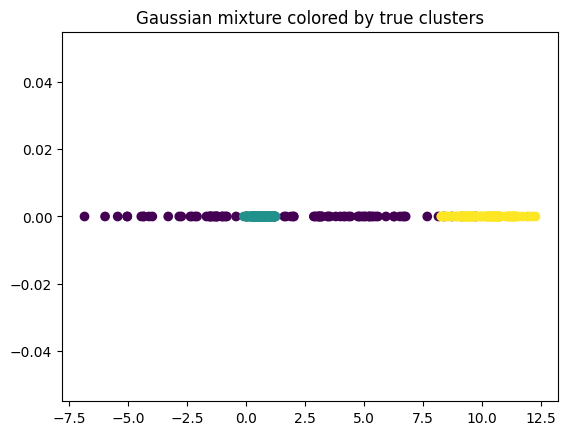

In [8]:
# Generate some synthetic 2-dimensional data
# Roughly recreating the sample from the handout of Dr. Hagemann
X = np.concatenate((np.random.normal(1.7, 4.3, 100),
               np.random.normal(0.6, 0.3, 100),
               np.random.normal(10, 1, 100)))
true_labels = np.zeros(300, dtype=int)
true_labels[100:200] = 1
true_labels[200:] = 2

# plot_1 = plt.subplot(1, 2, 1)
# plt.subplots_adjust(bottom=0.1, right=1.6, top=0.9)
plt.scatter(X, np.zeros(300), c=true_labels)
plt.title("Gaussian mixture colored by true clusters")

# Run EM clusterer on the data
SoftKM = GMM(k=3)
SoftKM.fit(X)
labels, means = SoftKM.predict(X)
print(labels)
print(means)

# plot_2 = plt.subplot(1, 2, 2)
# plt.scatter(X[:, 0], X[:, 1], c=labels)
# plt.title("Clustering by EM algorithm")
plt.show()

## Task 2.2.2 - Regularizing the GMM (BONUS)

* Implement regularization techniques for the covariance matrices to towards the assumption of uncorrelated input features. Extend the existing `GMM` class above. **(RESULT)**

In [ ]:
# TODO

## Congratz, you made it! :)